In [1]:
%load_ext autoreload
%autoreload 2

## Physics Informed Neural Networks for Inverse Problems

In [2]:
from pinn import PINNTrainer
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np

## Set up

In [3]:
kwargs = {
    "alpha_f" :0.05 ,
    "h_f" : 5,
    "T_hot" : 4,
    "u_f" : 1,
    "T0" : 1,
    "T_cold" : 1,
}

n_int = 128
n_sb = 64
n_tb = 64

pinn = PINNTrainer(n_int, n_sb, n_tb, **kwargs)

In [4]:
# Plot the input training points

input_sb_, output_sb_ = pinn.add_spatial_boundary_points()
input_tb_, output_tb_ = pinn.add_temporal_boundary_points()
input_int_, output_int_ = pinn.add_interior_points()
input_meas_, output_meas_ = pinn.get_measurement_data()

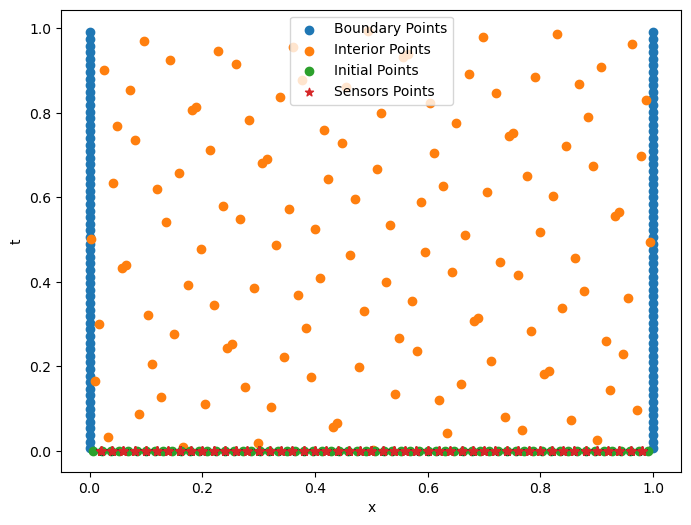

In [5]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(input_sb_[:, 1].detach().numpy(), input_sb_[:, 0].detach().numpy(), label="Boundary Points")
plt.scatter(input_int_[:, 1].detach().numpy(), input_int_[:, 0].detach().numpy(), label="Interior Points")
plt.scatter(input_tb_[:, 1].detach().numpy(), input_tb_[:, 0].detach().numpy(), label="Initial Points")
plt.scatter(input_meas_[:, 1].detach().numpy(), input_meas_[:, 0].detach().numpy()*0, label="Sensors Points", marker="*")

plt.xlabel("x")
plt.ylabel("t")
plt.legend()
plt.show()

## Training

In [6]:
hist = pinn.fit(num_epochs=1, verbose=True)

################################  0  ################################
Total loss:  2.125 | PDE Loss:  1.1211 | Function Loss:  0.0847
Total loss:  2.116 | PDE Loss:  1.1131 | Function Loss:  -0.0603
Total loss:  2.0419 | PDE Loss:  1.0403 | Function Loss:  -0.4076
Total loss:  1.8904 | PDE Loss:  0.6877 | Function Loss:  1.4621
Total loss:  1.8281 | PDE Loss:  0.6691 | Function Loss:  1.3144
Total loss:  1.6434 | PDE Loss:  0.6193 | Function Loss:  0.3771
Total loss:  1.5599 | PDE Loss:  0.546 | Function Loss:  0.06
Total loss:  1.5344 | PDE Loss:  0.5125 | Function Loss:  0.2259
Total loss:  1.5265 | PDE Loss:  0.5034 | Function Loss:  0.2407
Total loss:  1.5064 | PDE Loss:  0.48 | Function Loss:  0.2774
Total loss:  1.4427 | PDE Loss:  0.4103 | Function Loss:  0.2995
Total loss:  1.42 | PDE Loss:  0.3934 | Function Loss:  0.193
Total loss:  1.385 | PDE Loss:  0.3708 | Function Loss:  -0.1078
Total loss:  1.364 | PDE Loss:  0.3541 | Function Loss:  -0.283
Total loss:  1.3467 | PDE Los

## Visualization

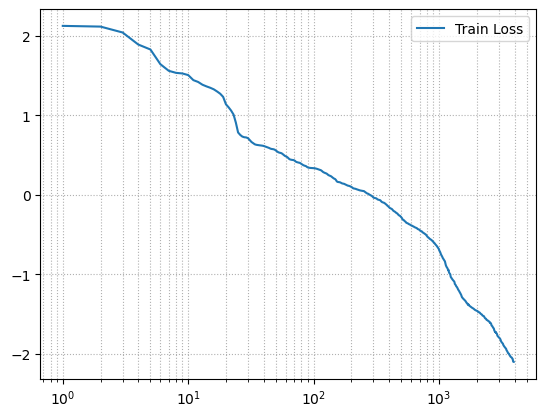

In [7]:
plt.figure(dpi=100)
plt.grid(True, which="both", ls=":")
plt.plot(np.arange(1, len(hist) + 1), hist, label="Train Loss")
plt.xscale("log")
plt.legend()

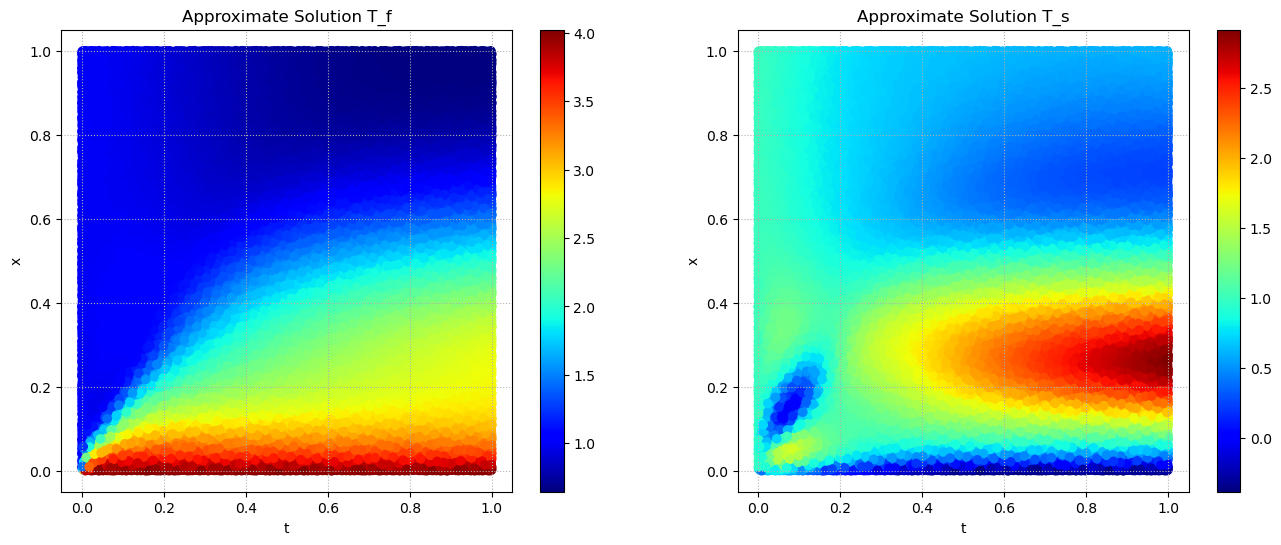

In [15]:
pinn.plot()

Text(0.5, 1.0, 'Measured Tf')

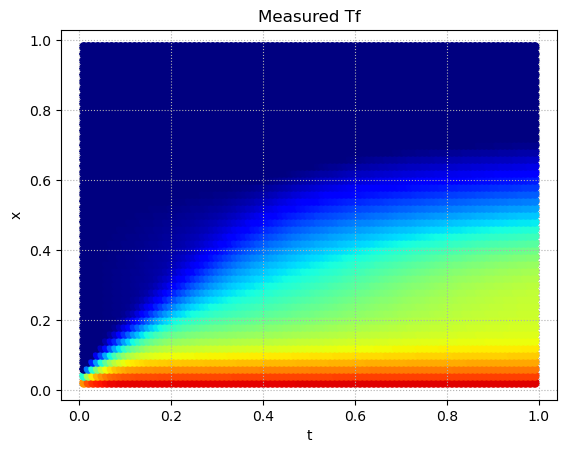

In [17]:
plt.scatter(
    input_meas_[:, 0],
    input_meas_[:, 1],
    c=output_meas_,
    cmap="jet",
    clim=(1, 4)
)
plt.xlabel("t")
plt.ylabel("x")
plt.grid(True, which="both", ls=":")
plt.title(f"Measured Tf")